### Model Training 

In [67]:
# Basic import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings

In [68]:
# Import csv data to pandas dataframe
df= pd.read_csv('data/stud.csv')

In [69]:
# Display first 5 rows of df
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [70]:
# Preparing dependent and independent features
X = df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [71]:
Y = df['math_score']
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [72]:
# Create column transformer 
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('OneHotEncoder',categorical_transformer,cat_features),
    ('StandardScaler',numeric_transformer,num_features)
])

In [73]:
X = preprocessor.fit_transform(X)

In [74]:
X.shape

(1000, 19)

In [75]:
# separate  dataset into train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [76]:
# Create evaluation metrics to give all metrics after model training

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mae, rmse, r2_square

In [77]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision tree" : DecisionTreeRegressor(),
    "Random Forest regressor" : RandomForestRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "CatBoost Regressor" : CatBoostRegressor(verbose=False),
    "XGBoost regressor" : XGBRegressor(),
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,Y_train)

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate train and test data
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(Y_train,Y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(Y_test,Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print("- Root mean squared error : {:.4f}".format(model_train_rmse))
    print("- Mean absolute error : {:.4f}".format(model_train_mae))
    print("- R2 score : {:.4f}".format(model_train_r2))

    print("--------------------------------------------------------")
    print("Model performance for test set")
    print("- Root mean squared error : {:.4f}".format(model_test_rmse))
    print("- Mean absolute error : {:.4f}".format(model_test_mae))
    print("- R2 score : {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print("=" * 40)


Linear Regression
Model performance for training set
- Root mean squared error : 5.3273
- Mean absolute error : 4.2787
- R2 score : 0.8741
--------------------------------------------------------
Model performance for test set
- Root mean squared error : 5.4096
- Mean absolute error : 4.2259
- R2 score : 0.8797
Lasso
Model performance for training set
- Root mean squared error : 6.5938
- Mean absolute error : 5.2063
- R2 score : 0.8071
--------------------------------------------------------
Model performance for test set
- Root mean squared error : 6.5197
- Mean absolute error : 5.1579
- R2 score : 0.8253
Ridge
Model performance for training set
- Root mean squared error : 5.3233
- Mean absolute error : 4.2650
- R2 score : 0.8743
--------------------------------------------------------
Model performance for test set
- Root mean squared error : 5.3904
- Mean absolute error : 4.2111
- R2 score : 0.8806
K-Neighbors Regressor
Model performance for training set
- Root mean squared error : 

In [78]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.879740
5,Random Forest regressor,0.852968
6,AdaBoost Regressor,0.852075
7,CatBoost Regressor,0.851632
8,XGBoost regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision tree,0.731814


In [79]:
# So we choose Linear regression 

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test,y_pred) * 100
print("Accuracy for the model is %.2f"%score)

Accuracy for the model is 87.97


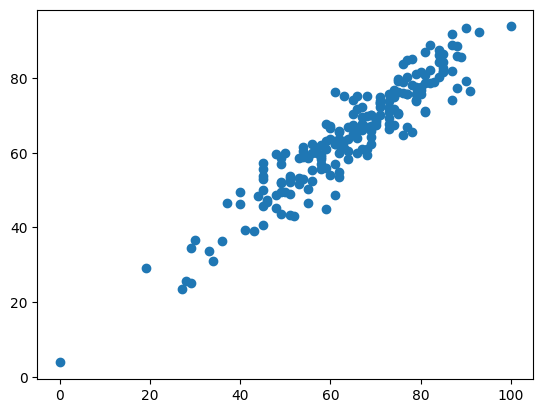

In [80]:
# plot ytest and ypred
plt.scatter(Y_test,y_pred)

<Axes: xlabel='math_score'>

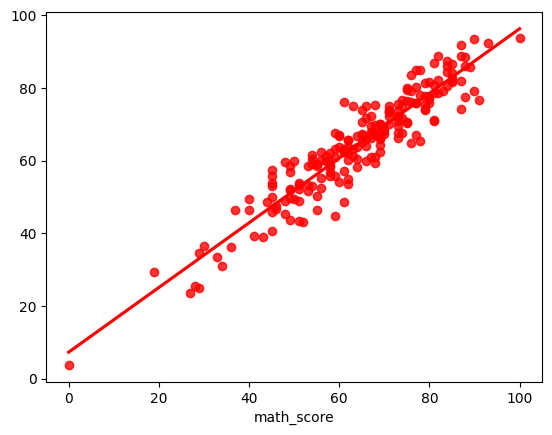

In [81]:
sns.regplot(x=Y_test,y=y_pred,color='red',ci=None)

In [82]:
# Difference between actual and predicted values
pred_df = pd.DataFrame({
    'Actual Value' : Y_test,
    'Predicted Value' : y_pred,
    'Difference' : Y_test - y_pred
    })
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
